In [2]:
import pandas as pd
data=pd.read_csv("insurance.csv")

Read first five data from top

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check last five rows of the dataset

In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Find the shape of our dataset(Number of rowsand number of columns)

In [4]:
data.shape

(1338, 7)

In [5]:
print("number of rows",data.shape[0])
print("number of columns",data.shape[1])

number of rows 1338
number of columns 7


Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column 
And Memory Requirement

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 Get Overall Statistics About The Dataset

In [7]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Check Null Values In The Dataset

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values

In [9]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})

In [10]:
data['smoker'].unique()
data['smoker']=data['smoker'].map({'yes':0,'no':1})

In [11]:
data['region'].unique()
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


Store Feature Matrix In X and Response(Target) In Vector y

In [13]:
data.columns
X=data.drop(['charges'],axis=1)
y=data['charges']

Train/Test split
1. Split data into two part : a training set and a testing set
2. Train the model(s) on training set
3. Test the Model(s) on Testing set#

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

Import the models

In [ ]:
from sklearn.linear_model import LinearRegression

Model Training

In [61]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Prediction on Test Data

In [62]:
y_pred=lr.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Lr':y_pred})
df

,Actual,Lr
12,1826.84300,4243.315613
306,20177.67113,4369.130655
318,7421.19455,8459.055910
815,1877.92940,2915.207396
157,15518.18025,24708.665557
...,...,...
713,1984.45330,6480.133546
1282,14283.45940,23610.114962
531,14043.47670,14857.574372
537,8825.08600,9955.079471


Compare Performance

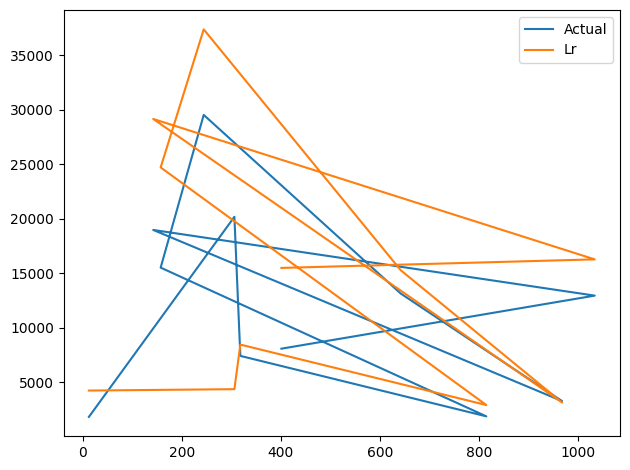

In [63]:
import matplotlib.pyplot as plt
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Lr'].iloc[0:11],label='Lr')

plt.tight_layout()
plt.legend()

In [64]:
from sklearn import metrics
score=metrics.r2_score(y_test,y_pred)
print(score)

0.7942462599118463


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

In [67]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [68]:
print(df1)

           Actual            Lr          svm            rf            gr
12     1826.84300   4243.315613  9065.696286   4325.000291   3991.263055
306   20177.67113   4369.130655  9085.766528   4456.426596   6265.797064
318    7421.19455   8459.055910  9194.232909  15871.676151  10389.576532
815    1877.92940   2915.207396  9053.321270   2189.940662   2692.448330
157   15518.18025  24708.665557  9048.382988  17533.487528  16075.139058
...           ...           ...          ...           ...           ...
713    1984.45330   6480.133546  9063.247148   6487.467850   4603.257114
1282  14283.45940  23610.114962  9050.736570  14339.297244  14830.065026
531   14043.47670  14857.574372  9305.152023  13517.616072  14470.821712
537    8825.08600   9955.079471  9210.225079   9000.811567   9571.086218
1015  12124.99240  11758.314936  9288.241872  15013.688986  15193.078160

[268 rows x 5 columns]


In [69]:
import matplotlib.pyplot as plt


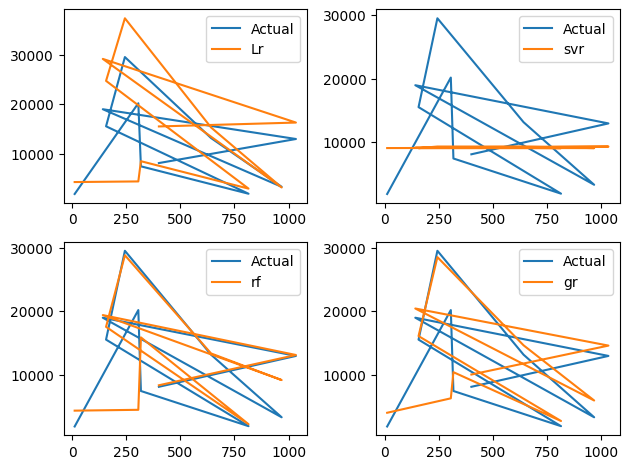

In [70]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [71]:
from sklearn import metrics

In [72]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [73]:
print(score1,score2,score3,score4)

0.7942462599118463 -0.15180893080398672 0.8645307514984092 0.8980080233810821


In [74]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [75]:
print(s1,s2,s3,s4)

3920.471300205895 8631.798964092302 2799.253969832258 2377.650834788644


Predict Charges For New Customer

In [76]:
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [77]:
new_pred=lr.predict(df)
print("Medical Insurance Cost For New Customer Is:",new_pred[0])

Medical Insurance Cost For New Customer Is: 12836.582493753749


In [78]:
lr= LinearRegression()
lr.fit(X,y)

LinearRegression()

In [79]:
lr.score(X_test,y_test)

0.7972358113557931

In [34]:
import joblib


In [35]:
joblib.dump(lr,'our_model')

['our_model']

In [36]:
model= joblib.load('our_model')

In [37]:
model.predict(df)

array([12957.7339639])

GUI


In [38]:
from tkinter import *

In [39]:
import joblib

In [ ]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())

    model= joblib.load("our_model")
    result=  model.predict([[p1,p2,p3,p4,p5,p6]])


    Label(master,text= "Insurance Cost").grid(row=7)
    Label(master, text= result).grid(row=8)



master = Tk()
master.title("Insurance Cost Prediction")
label= Label(master,text= "Insurance Cost Prediction", bg= "black",fg= "white").grid(row=0,columnspan=2)
Label(master,text= "Enter your age").grid(row=1)
Label(master,text= "Male or Female 1/0").grid(row=2)
Label(master,text= "Enter your bmi").grid(row=3)
Label(master,text= "Enter number of children").grid(row=4)
Label(master,text= "Smoker 0/1").grid(row=5)
Label(master,text= "region 1/2/3/4").grid(row=6)

e1= Entry(master)
e2= Entry(master)
e3= Entry(master)
e4= Entry(master)
e5= Entry(master)
e6= Entry(master)




e1.grid(row=1,column =1)
e2.grid(row=2,column =1)
e3.grid(row=3,column =1)
e4.grid(row=4,column =1)
e5.grid(row=5,column =1)
e6.grid(row=6,column =1)

Button(master,text="Predict",command=show_entry).grid()


mainloop()

C:\Users\kashp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
